In [28]:
# getting mocap data
from support.funcs import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_mocap,starttime=read_df_csv(r'C:\Users\arpan\OneDrive\Documents\internship\mocapcsv\arpan_t2.csv')

# converting to epoch time
epoch_time = starttime.timestamp() 
time=df_mocap['seconds'].to_numpy()
time=time+epoch_time
df_mocap.insert(1,'epoch_time',time)
df_mocap.columns

# getting mpipe data
df_mpipe=pd.read_csv('mpipe.csv')
df_mpipe

# converting mpipe to mocap frame
rotmat=[]
org=[]
with open(r'C:\Users\arpan\OneDrive\Documents\internship\D435_rotmat.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        x=x.replace(']','')
        x=x.replace('[','')
        line=x.split(' ')
        while ' ' in line:
            line=line.remove(' ')
        #k_rotmat.append([float(x)])
        while '' in line:
            ind=line.index('')
            line.pop(ind)
        x=[]
        for i in line:
            x.append(float(i))
        rotmat.append(x)
    rotmat=np.array(rotmat)

with open(r'C:\Users\arpan\OneDrive\Documents\internship\D435_org.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        x=x.replace(']','')
        x=x.replace('[','')
        org.append([float(x)])
    k_org=np.array(org)

# print(rotmat)
# print(org)

def frame_con(point,rotmat,org):
    point=np.array(point)
    point=point.reshape(3,1)
    point=point-org 
    point=np.matmul(rotmat.T,point)
    return point

for index,j in df_mpipe.iterrows():
    for k in range(1,1+7*3,3):
        point=[]
        for p in range(k,k+3):
            point.append(j[p])
        converted_point=frame_con(point,rotmat,org)
        # print(converted_point)
        for o in range(3):
            df_mpipe.iloc[index,k+o]=converted_point[o]

df_mpipe

# occlusion based on limb length
df_limb=pd.read_csv('limbl.csv')
oLul,oLll,oLf,oRul,oRll,oRf,oH=[0],[0],[0],[0],[0],[0],[0]
th=0.10 # 10cm
for i in range(1,len(df_limb)):
    if abs(df_limb['Lul'][i]-df_limb['Lul'].mean())>th:
        oLul.append(1)
    else:
        oLul.append(0)
    if abs(df_limb['Lll'][i]-df_limb['Lll'].mean())>th:
        oLll.append(1)
    else:
        oLll.append(0)
    if abs(df_limb['Lf'][i]-df_limb['Lf'].mean())>th:
        oLf.append(1)
    else:
        oLf.append(0)
    if abs(df_limb['Rul'][i]-df_limb['Rul'].mean())>th:
        oRul.append(1)
    else:
        oRul.append(0)
    if abs(df_limb['Rll'][i]-df_limb['Rll'].mean())>th:
        oRll.append(1)
    else:
        oRll.append(0)
    if abs(df_limb['Rf'][i]-df_limb['Rf'].mean())>th:
        oRf.append(1)
    else:
        oRf.append(0)
    if abs(df_limb['H'][i]-df_limb['H'].mean())>th:
        oH.append(1)
    else:
        oH.append(0)
    
# filtering occlusion limb length
for index,j in df_mpipe.iterrows():
    
    for k in range(3):
        if oLul[index]==0 and oH[index]==0:
            LHx=df_mpipe['LH_x'].iloc[index]
            LHy=df_mpipe['LH_y'].iloc[index]
            LHz=df_mpipe['LH_z'].iloc[index]
        df_mpipe['LH_x'].iloc[index]=LHx
        df_mpipe['LH_y'].iloc[index]=LHy
        df_mpipe['LH_z'].iloc[index]=LHz
        
    for k in range(3):
        if oLll[index]==0 and oLul[index]==0:
            LKx=df_mpipe['LK_x'].iloc[index]
            LKy=df_mpipe['LK_y'].iloc[index]
            LKz=df_mpipe['LK_z'].iloc[index]
        df_mpipe['LK_x'].iloc[index]=LKx
        df_mpipe['LK_y'].iloc[index]=LKy
        df_mpipe['LK_z'].iloc[index]=LKz

    for k in range(3):
        if oLll[index]==0 and oLf[index]==0:
            LAx=df_mpipe['LA_x'].iloc[index]
            LAy=df_mpipe['LA_y'].iloc[index]
            LAz=df_mpipe['LA_z'].iloc[index]
        df_mpipe['LA_x'].iloc[index]=LAx
        df_mpipe['LA_y'].iloc[index]=LAy
        df_mpipe['LA_z'].iloc[index]=LAz

    for k in range(3):
        if oLf[index]==0:
            LFx=df_mpipe['LT_x'].iloc[index]
            LFy=df_mpipe['LT_y'].iloc[index]
            LFz=df_mpipe['LT_z'].iloc[index]
        df_mpipe['LT_x'].iloc[index]=LFx
        df_mpipe['LT_y'].iloc[index]=LFy
        df_mpipe['LT_z'].iloc[index]=LFz

    for k in range(3):
            if oRul[index]==0 and oH[index]==0:
                RHx=df_mpipe['RH_x'].iloc[index]
                RHy=df_mpipe['RH_y'].iloc[index]
                RHz=df_mpipe['RH_z'].iloc[index]
            df_mpipe['RH_x'].iloc[index]=RHx
            df_mpipe['RH_y'].iloc[index]=RHy
            df_mpipe['RH_z'].iloc[index]=RHz
        
    for k in range(3):
        if oRll[index]==0 and oRul[index]==0:
            RKx=df_mpipe['RK_x'].iloc[index]
            RKy=df_mpipe['RK_y'].iloc[index]
            RKz=df_mpipe['RK_z'].iloc[index]
        df_mpipe['RK_x'].iloc[index]=RKx
        df_mpipe['RK_y'].iloc[index]=RKy
        df_mpipe['RK_z'].iloc[index]=RKz


    for k in range(3):
        if oRll[index]==0 and oRf[index]==0:
            RAx=df_mpipe['RA_x'].iloc[index]
            RAy=df_mpipe['RA_y'].iloc[index]
            RAz=df_mpipe['RA_z'].iloc[index]
        df_mpipe['RA_x'].iloc[index]=RAx
        df_mpipe['RA_y'].iloc[index]=RAy
        df_mpipe['RA_z'].iloc[index]=RAz


    for k in range(3):
        if oRf[index]==0:
            RFx=df_mpipe['RT_x'].iloc[index]
            RFy=df_mpipe['RT_y'].iloc[index]
            RFz=df_mpipe['RT_z'].iloc[index]
        df_mpipe['RT_x'].iloc[index]=RFx
        df_mpipe['RT_y'].iloc[index]=RFy
        df_mpipe['RT_z'].iloc[index]=RFz

def pvt(x,t):
    from scipy.signal import savgol_filter
    y=[]
    for i in x:
        y.append(i)
    # y=[i for i in y if str(i) != 'nan']
    w = savgol_filter(y,  20,2)
    plt.plot(t,w)
    # plt.ylim(-1,1)
    plt.xlabel('time(s)')

    

In [29]:
# calibration frame
f=False
for ind,val in enumerate(df_mpipe['epoch_time'].tolist()):
    for i,v in enumerate(df_mocap['epoch_time'].tolist()):
        if v==val:
            print(ind,i,val)
            mpipe_cf=ind
            mocap_cf=i
            f=True
            break
    if f:
        break

print('\n-----------------------\n')

for ind,val in enumerate(df_mpipe['epoch_time'].tolist()):
    for i,v in enumerate(df_mocap['epoch_time'].tolist()):
        if v==val:
            print(ind,i,val)


-----------------------



In [30]:
# calibrate the frame shoulder frame of reference

mpipe_cf=20

mpiperrf=find_orthogonal_frame([df_mpipe['RK_x'][mpipe_cf]-df_mpipe['RH_x'][mpipe_cf],df_mpipe['RK_y'][mpipe_cf]-df_mpipe['RH_y'][mpipe_cf],df_mpipe['RK_z'][mpipe_cf]-df_mpipe['RH_z'][mpipe_cf]],
                               [df_mpipe['RA_x'][mpipe_cf]-df_mpipe['RK_x'][mpipe_cf],df_mpipe['RA_y'][mpipe_cf]-df_mpipe['RK_y'][mpipe_cf],df_mpipe['RA_z'][mpipe_cf]-df_mpipe['RK_z'][mpipe_cf]])

mpipelrf=find_orthogonal_frame([df_mpipe['LK_x'][mpipe_cf]-df_mpipe['LH_x'][mpipe_cf],df_mpipe['LK_y'][mpipe_cf]-df_mpipe['LH_y'][mpipe_cf],df_mpipe['LK_z'][mpipe_cf]-df_mpipe['LH_z'][mpipe_cf]],
                               [df_mpipe['LA_x'][mpipe_cf]-df_mpipe['LK_x'][mpipe_cf],df_mpipe['LA_y'][mpipe_cf]-df_mpipe['LK_y'][mpipe_cf],df_mpipe['LA_z'][mpipe_cf]-df_mpipe['LK_z'][mpipe_cf]])

# mocaprrf=find_orthogonal_frame([df_mocap['RK_x'][mocap_cf]-df_mocap['RH_x'][mocap_cf],df_mocap['RK_y'][mocap_cf]-df_mocap['RH_y'][mocap_cf],df_mocap['RK_z'][mocap_cf]-df_mocap['RH_z'][mocap_cf]],
#                                [df_mocap['RA_x'][mocap_cf]-df_mocap['RK_x'][mocap_cf],df_mocap['RA_y'][mocap_cf]-df_mocap['RK_y'][mocap_cf],df_mocap['RA_z'][mocap_cf]-df_mocap['RK_z'][mocap_cf]])

# mocaplrf=find_orthogonal_frame([df_mocap['LK_x'][mocap_cf]-df_mocap['LH_x'][mocap_cf],df_mocap['LK_y'][mocap_cf]-df_mocap['LH_y'][mocap_cf],df_mocap['LK_z'][mocap_cf]-df_mocap['LH_z'][mocap_cf]],
#                                [df_mocap['LA_x'][mocap_cf]-df_mocap['LK_x'][mocap_cf],df_mocap['LA_y'][mocap_cf]-df_mocap['LK_y'][mocap_cf],df_mocap['LA_z'][mocap_cf]-df_mocap['LK_z'][mocap_cf]])


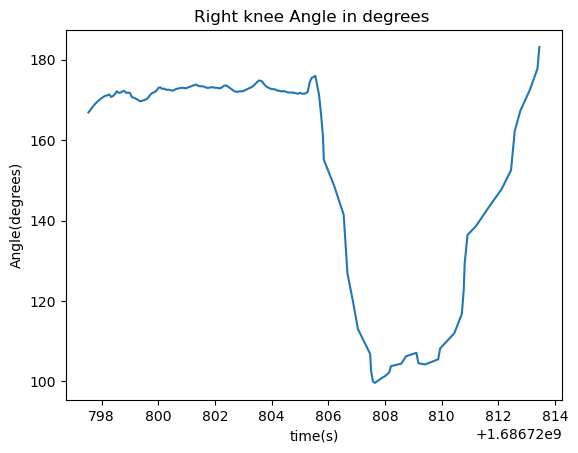

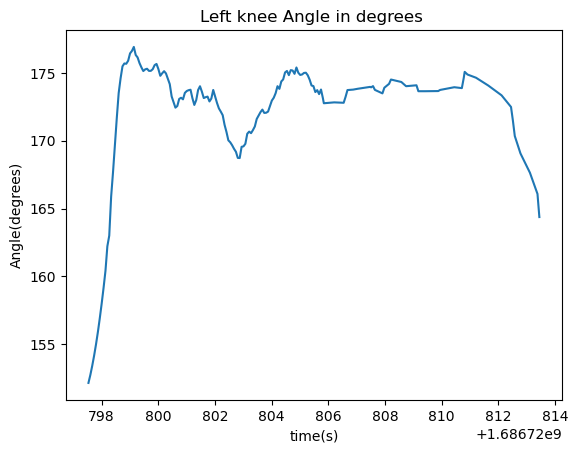

In [31]:
#calculating the knee angle
mpipeRKa, mocapRKa=[],[]

for i in range(len(df_mpipe['epoch_time'].tolist())):
    mpipeRKa.append(angle3point([df_mpipe['RH_x'][i],df_mpipe['RH_y'][i],df_mpipe['RH_z'][i]],
                                [df_mpipe['RK_x'][i],df_mpipe['RK_y'][i],df_mpipe['RK_z'][i]],
                                [df_mpipe['RA_x'][i],df_mpipe['RA_y'][i],df_mpipe['RA_z'][i]]))
   
# for i in range(len(df_mocap['epoch_time'].tolist())):
#     mocapRKa.append(angle3point([df_mocap['RH_x'][i],df_mocap['RH_y'][i],df_mocap['RH_z'][i]],
#                                 [df_mocap['RK_x'][i],df_mocap['RK_y'][i],df_mocap['RK_z'][i]],
#                                 [df_mocap['RA_x'][i],df_mocap['RA_y'][i],df_mocap['RA_z'][i]]))
    
#test graph right elbow angle wihtout occlusion
pvt(mpipeRKa,df_mpipe['epoch_time'])
# pvt(mocapRKa,df_mocap['epoch_time'])
plt.title('Right knee Angle in degrees ')
plt.xlabel('time(s)')
plt.ylabel('Angle(degrees)')
# plt.legend(['mediapipe','mocap'])
# plt.ylim(0,180)
plt.show()

# print('RMSE of right knee Angle:',RMSE(mocapRKa,mpipeRKa,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

mpipeLKa, mocapLKa=[],[]

for i in range(len(df_mpipe['epoch_time'].tolist())):
    mpipeLKa.append(angle3point([df_mpipe['LH_x'][i],df_mpipe['LH_y'][i],df_mpipe['LH_z'][i]],
                                [df_mpipe['LK_x'][i],df_mpipe['LK_y'][i],df_mpipe['LK_z'][i]],
                                [df_mpipe['LA_x'][i],df_mpipe['LA_y'][i],df_mpipe['LA_z'][i]]))
   
# for i in range(len(df_mocap['epoch_time'].tolist())):
#     mocapLKa.append(angle3point([df_mocap['LH_x'][i],df_mocap['LH_y'][i],df_mocap['LH_z'][i]],
#                                 [df_mocap['LK_x'][i],df_mocap['LK_y'][i],df_mocap['LK_z'][i]],
#                                 [df_mocap['LA_x'][i],df_mocap['LA_y'][i],df_mocap['LA_z'][i]]))
   
#test graph right elbow angle wihtout occlusion
pvt(mpipeLKa,df_mpipe['epoch_time'])
# pvt(mocapLKa,df_mocap['epoch_time'])
plt.title('Left knee Angle in degrees ')
plt.xlabel('time(s)')
plt.ylabel('Angle(degrees)')
# plt.legend(['mediapipe','mocap'])
# plt.ylim(0,180)
plt.show()
# print('RMSE of left knee Angle:',RMSE(mocapLKa,mpipeLKa,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))


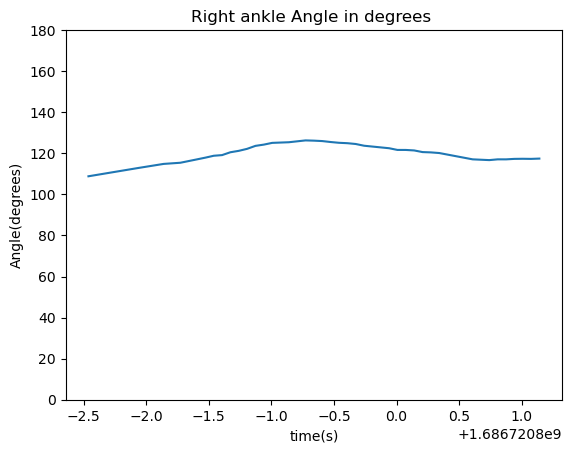

[18.977446985661498, 21.165082979501456, 29.24179611481747, 27.687884342794764, 24.970666891499278, 28.228066599225453, 24.215168905612256, 22.018650923563584, 19.497783989499, 14.771766907091642, 17.170663538664233, 16.731392929737805, 17.223219697721497, 17.354713153711675, 18.092574326471865, 18.443453321122714, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

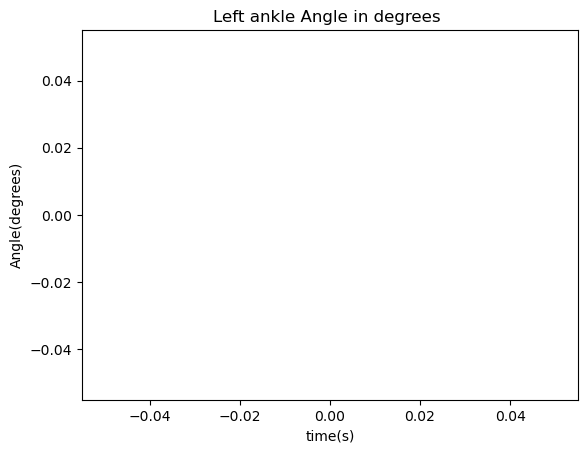

In [45]:
#calculating the ankle angle
mpipeRAa, mocapRaa=[],[]

for i in range(len(df_mpipe['epoch_time'].tolist())):
    mpipeRAa.append(angle3point([df_mpipe['RT_x'][i],df_mpipe['RT_y'][i],df_mpipe['RT_z'][i]],
                                [df_mpipe['RK_x'][i],df_mpipe['RK_y'][i],df_mpipe['RK_z'][i]],
                                [df_mpipe['RA_x'][i],df_mpipe['RA_y'][i],df_mpipe['RA_z'][i]]))
   
# for i in range(len(df_mocap['epoch_time'].tolist())):
#     mocapRAa.append(angle3point([df_mocap['RT_x'][i],df_mocap['RT_y'][i],df_mocap['RT_z'][i]],
#                                 [df_mocap['RK_x'][i],df_mocap['RK_y'][i],df_mocap['RK_z'][i]],
#                                 [df_mocap['RA_x'][i],df_mocap['RA_y'][i],df_mocap['RA_z'][i]]))
    
#test graph right elbow angle wihtout occlusion
pvt(mpipeRAa,df_mpipe['epoch_time'])
# pvt(mocapRAa,df_mocap['epoch_time'])
plt.title('Right ankle Angle in degrees ')
plt.xlabel('time(s)')
plt.ylabel('Angle(degrees)')
# plt.legend(['mediapipe','mocap'])
plt.ylim(0,180)
plt.show()

# print('RMSE of right knee Angle:',RMSE(mocapRKa,mpipeRKa,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

mpipeLAa, mocapLAa=[],[]

for i in range(len(df_mpipe['epoch_time'].tolist())):
    mpipeLAa.append(angle3point([df_mpipe['LT_x'][i],df_mpipe['LT_y'][i],df_mpipe['LT_z'][i]],
                                [df_mpipe['LK_x'][i],df_mpipe['LK_y'][i],df_mpipe['LK_z'][i]],
                                [df_mpipe['LA_x'][i],df_mpipe['LA_y'][i],df_mpipe['LA_z'][i]]))
   
# for i in range(len(df_mocap['epoch_time'].tolist())):
#     mocapLAa.append(angle3point([df_mocap['LT_x'][i],df_mocap['LT_y'][i],df_mocap['LT_z'][i]],
#                                 [df_mocap['LK_x'][i],df_mocap['LK_y'][i],df_mocap['LK_z'][i]],
#                                 [df_mocap['LA_x'][i],df_mocap['LA_y'][i],df_mocap['LA_z'][i]]))
   
#test graph right elbow angle wihtout occlusion
print(mpipeLAa)
pvt(mpipeLAa,df_mpipe['epoch_time'])
print('1')
# pvt(mocapLAa,df_mocap['epoch_time'])
plt.title('Left ankle Angle in degrees ')
plt.xlabel('time(s)')
plt.ylabel('Angle(degrees)')
# plt.legend(['mediapipe','mocap'])
# plt.ylim(0,180)
plt.show()
# print('RMSE of left knee Angle:',RMSE(mocapLKa,mpipeLKa,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

In [43]:
print(mpipeLAa)
print(mpipeLKa)

[18.977446985661498, 21.165082979501456, 29.24179611481747, 27.687884342794764, 24.970666891499278, 28.228066599225453, 24.215168905612256, 22.018650923563584, 19.497783989499, 14.771766907091642, 17.170663538664233, 16.731392929737805, 17.223219697721497, 17.354713153711675, 18.092574326471865, 18.443453321122714, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [46]:
# calculating euler angles for hip xzy-flexion/extension,abduction/adduction,internal/external rotation

mpipertheta1,mpipertheta2,mpipertheta3=[],[],[]
mpipeltheta1,mpipeltheta2,mpipeltheta3=[],[],[]
kath=160
for i in range(len(df_mpipe['epoch_time'].tolist())):
    newmat=find_orthogonal_frame([df_mpipe['RK_x'][i]-df_mpipe['RH_x'][i],df_mpipe['RK_y'][i]-df_mpipe['RH_y'][i],df_mpipe['RK_z'][i]-df_mpipe['RH_z'][i]],
                                 [df_mpipe['RA_x'][i]-df_mpipe['RK_x'][i],df_mpipe['RA_y'][i]-df_mpipe['RK_y'][i],df_mpipe['RA_z'][i]-df_mpipe['RK_z'][i]])
    rotmat=find_rotation_matrix(mpiperrf,newmat)
    mpiperthetas=rotation_angles(rotmat)

    newmat=find_orthogonal_frame([df_mpipe['LK_x'][mpipe_cf]-df_mpipe['LH_x'][mpipe_cf],df_mpipe['LK_y'][mpipe_cf]-df_mpipe['LH_y'][mpipe_cf],df_mpipe['LK_z'][mpipe_cf]-df_mpipe['LH_z'][mpipe_cf]],
                                 [df_mpipe['LA_x'][mpipe_cf]-df_mpipe['LK_x'][mpipe_cf],df_mpipe['LA_y'][mpipe_cf]-df_mpipe['LK_y'][mpipe_cf],df_mpipe['LA_z'][mpipe_cf]-df_mpipe['LK_z'][mpipe_cf]])
    rotmat=find_rotation_matrix(mpipelrf,newmat)
    mpipelthetas=rotation_angles(rotmat)

    mpipertheta1.append(mpiperthetas[0])
    mpipertheta2.append(mpiperthetas[1])
    if mpipeRKa[i]<kath:
        mpipertheta3.append(-mpiperthetas[2])  
    else:
        mpipertheta3.append(np.nan)

    mpipeltheta1.append(mpipelthetas[0])
    mpipeltheta2.append(-mpipelthetas[1])
    if mpipeLKa[i]<kath:
        mpipeltheta3.append(mpipelthetas[2])  
    else:
        mpipeltheta3.append(np.nan)

mocaprtheta1,mocaprtheta2,mocaprtheta3=[],[],[]
mocapltheta1,mocapltheta2,mocapltheta3=[],[],[]

# for i in range(len(df_mocap['epoch_time'].tolist())):
#     newmat=find_orthogonal_frame([df_mocap['RK_x'][i]-df_mocap['RH_x'][i],df_mocap['RK_y'][i]-df_mocap['RH_y'][i],df_mocap['RK_z'][i]-df_mocap['RH_z'][i]],
#                                  [df_mocap['RA_x'][i]-df_mocap['RK_x'][i],df_mocap['RA_y'][i]-df_mocap['RK_y'][i],df_mocap['RA_z'][i]-df_mocap['RK_z'][i]])
#     rotmat=find_rotation_matrix(mocaprrf,newmat)
#     mocaprthetas=rotation_angles(rotmat)

#     newmat=find_orthogonal_frame([df_mocap['RK_x'][mocap_cf]-df_mocap['RH_x'][mocap_cf],df_mocap['RK_y'][mocap_cf]-df_mocap['RH_y'][mocap_cf],df_mocap['RK_z'][mocap_cf]-df_mocap['RH_z'][mocap_cf]],
#                                  [df_mocap['RA_x'][mocap_cf]-df_mocap['RK_x'][mocap_cf],df_mocap['RA_y'][mocap_cf]-df_mocap['RK_y'][mocap_cf],df_mocap['RA_z'][mocap_cf]-df_mocap['RK_z'][mocap_cf]])
#     rotmat=find_rotation_matrix(mocaplrf,newmat)
#     mocaplthetas=rotation_angles(rotmat)
    
#     mocaprtheta1.append(mocaprthetas[0])
#     mocaprtheta2.append(mocaprthetas[1])
#     if mocapRKa[i]<kath:
#         mocaprtheta3.append(-mocaprthetas[2])  
#     else:
#         mocaprtheta3.append(np.nan)
#     mocapltheta1.append(mocaplthetas[0])
#     mocapltheta2.append(-mocaplthetas[1])
#     if mocapLKa[i]<kath:
#         mocapltheta3.append(mocaplthetas[2])  
#     else:
#         mocapltheta3.append(np.nan)

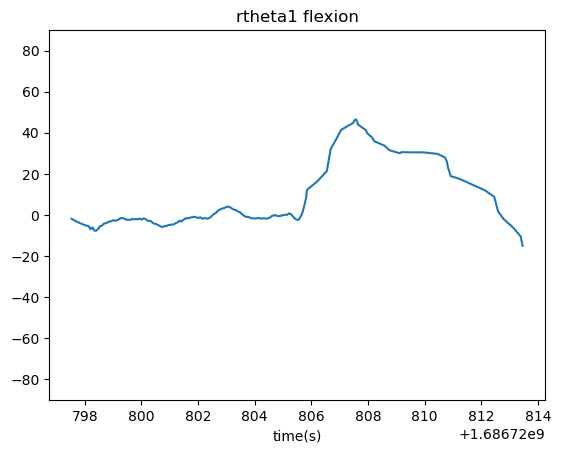

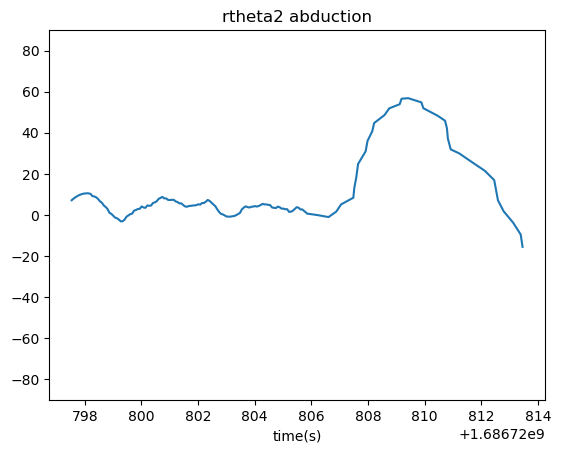

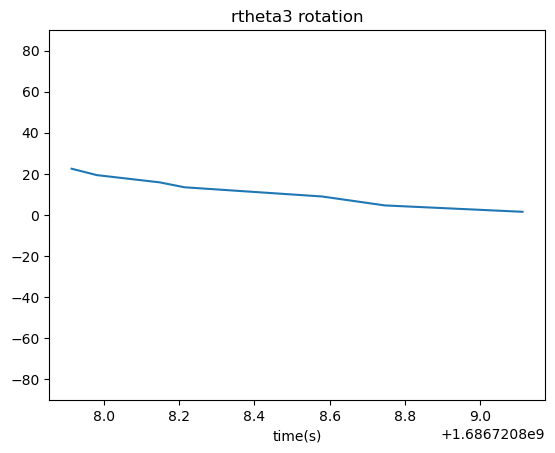

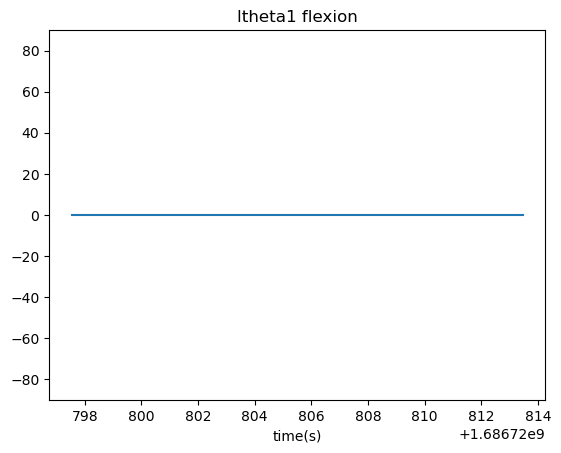

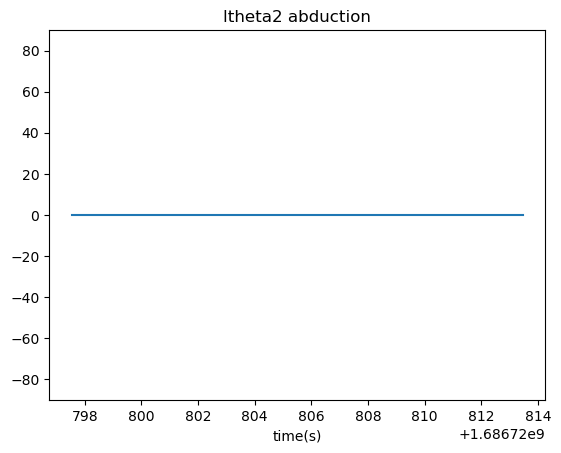

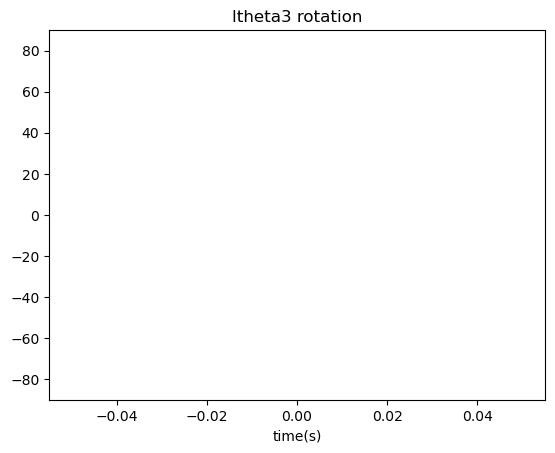

In [47]:
pvt(mpipertheta1,df_mpipe['epoch_time'])
# pvt(mocaprtheta1,df_mocap['epoch_time'])
# plt.legend(['mediapipe','mocap'])
plt.title('rtheta1 flexion')
plt.ylim(-90,90)
plt.show()

# print('RMSE of flexion/extension: ',RMSE(mocaprtheta1,mpipertheta1,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

pvt(mpipertheta2,df_mpipe['epoch_time'])
# pvt(mocaprtheta2,df_mocap['epoch_time'])
# plt.legend(['mediapipe','mocap'])
plt.title('rtheta2 abduction')
plt.ylim(-90,90)
plt.show()

# print('RMSE of abduct/adduct: ',RMSE(mocaprtheta2,mpipertheta2,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

pvt(mpipertheta3,df_mpipe['epoch_time'].tolist())
# pvt(mocaprtheta3,df_mocap['epoch_time'].tolist())
# plt.legend(['mediapipe','mocap'])
plt.title('rtheta3 rotation')
plt.ylim(-90,90)
plt.show()

# print('RMSE of internal/external rotation: ',RMSE(mocaprtheta3,mpipertheta3,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

pvt(mpipeltheta1,df_mpipe['epoch_time'])
# pvt(mocapltheta1,df_mocap['epoch_time'])
# plt.legend(['mediapipe','mocap'])
plt.title('ltheta1 flexion')
plt.ylim(-90,90)
plt.show()

# print('RMSE of flexion/extension: ',RMSE(mocapltheta1,mpipeltheta1,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

pvt(mpipeltheta2,df_mpipe['epoch_time'])
# pvt(mocapltheta2,df_mocap['epoch_time'])
# plt.legend(['mediapipe','mocap'])
plt.title('ltheta2 abduction')
plt.ylim(-90,90)
plt.show()

# print('RMSE of abduct/adduct: ',RMSE(mocapltheta2,mpipeltheta2,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))

pvt(mpipeltheta3,df_mpipe['epoch_time'].tolist())
# pvt(mocapltheta3,df_mocap['epoch_time'].tolist())
# plt.legend(['mediapipe','mocap'])
plt.title('ltheta3 rotation')
plt.ylim(-90,90)
plt.show()

# print('RMSE of internal/external rotation: ',RMSE(mocapltheta3,mpipeltheta3,df_mocap['epoch_time'].to_numpy(),df_mpipe['epoch_time'].to_numpy()))